In [8]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [9]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [10]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256
   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256
   15 shortcut 12
   16 conv    128  1 x 1

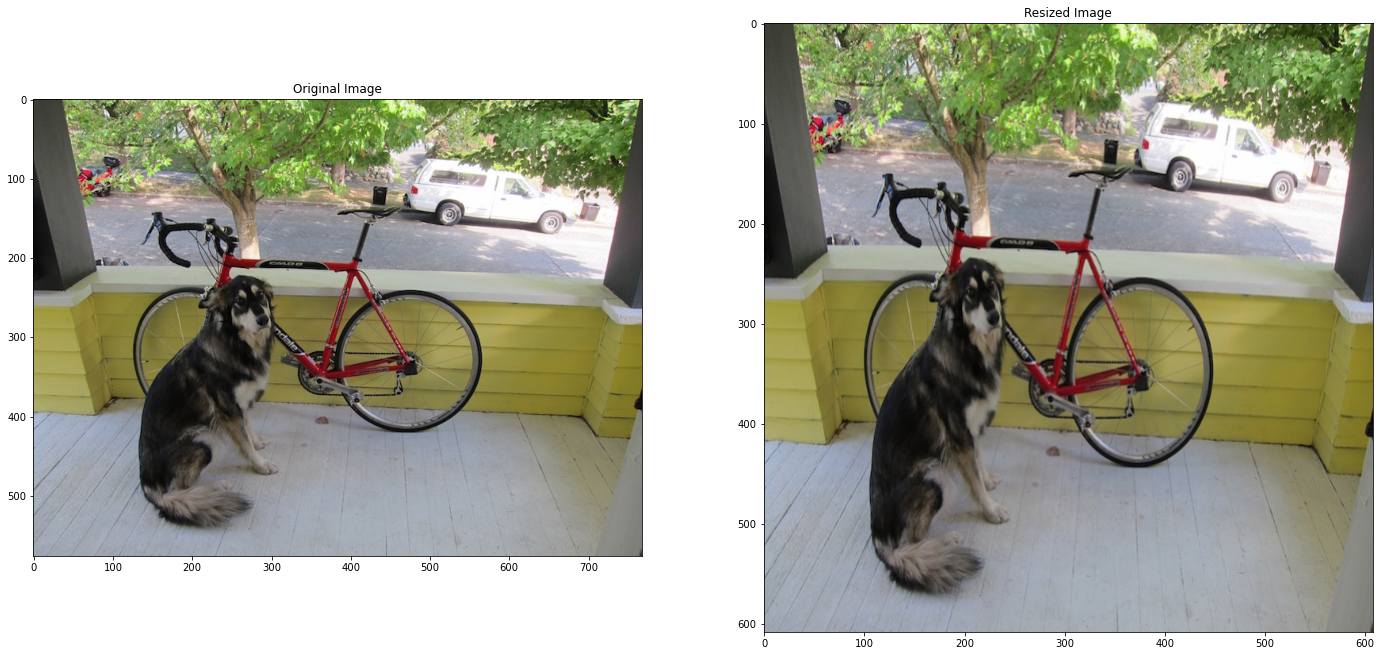

In [11]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [12]:
# Set the NMS threshold
nms_thresh = 0.6  

In [13]:
# Set the IOU threshold
iou_thresh = 0.4



It took 7.134 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. dog: 0.999998
2. bicycle: 0.999998
3. truck: 0.992799


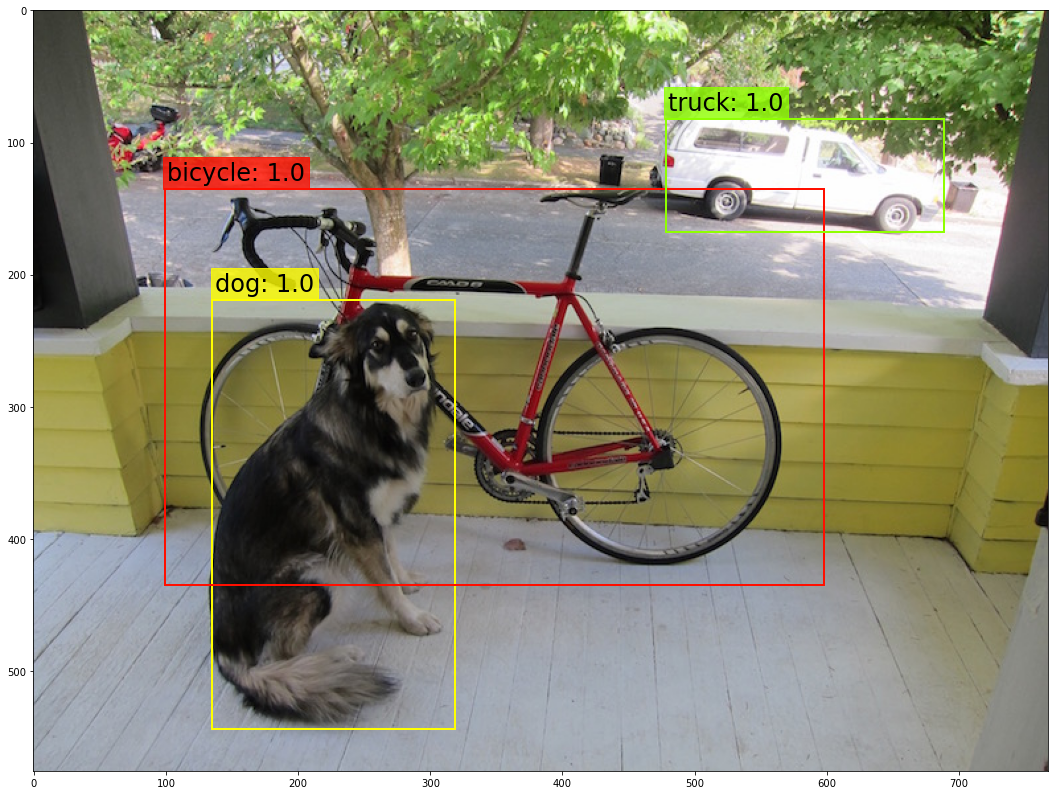

In [14]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.4

# Set the NMS threshold. Default value is 0.6
nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 5.021 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. car: 0.999770
2. car: 0.999407


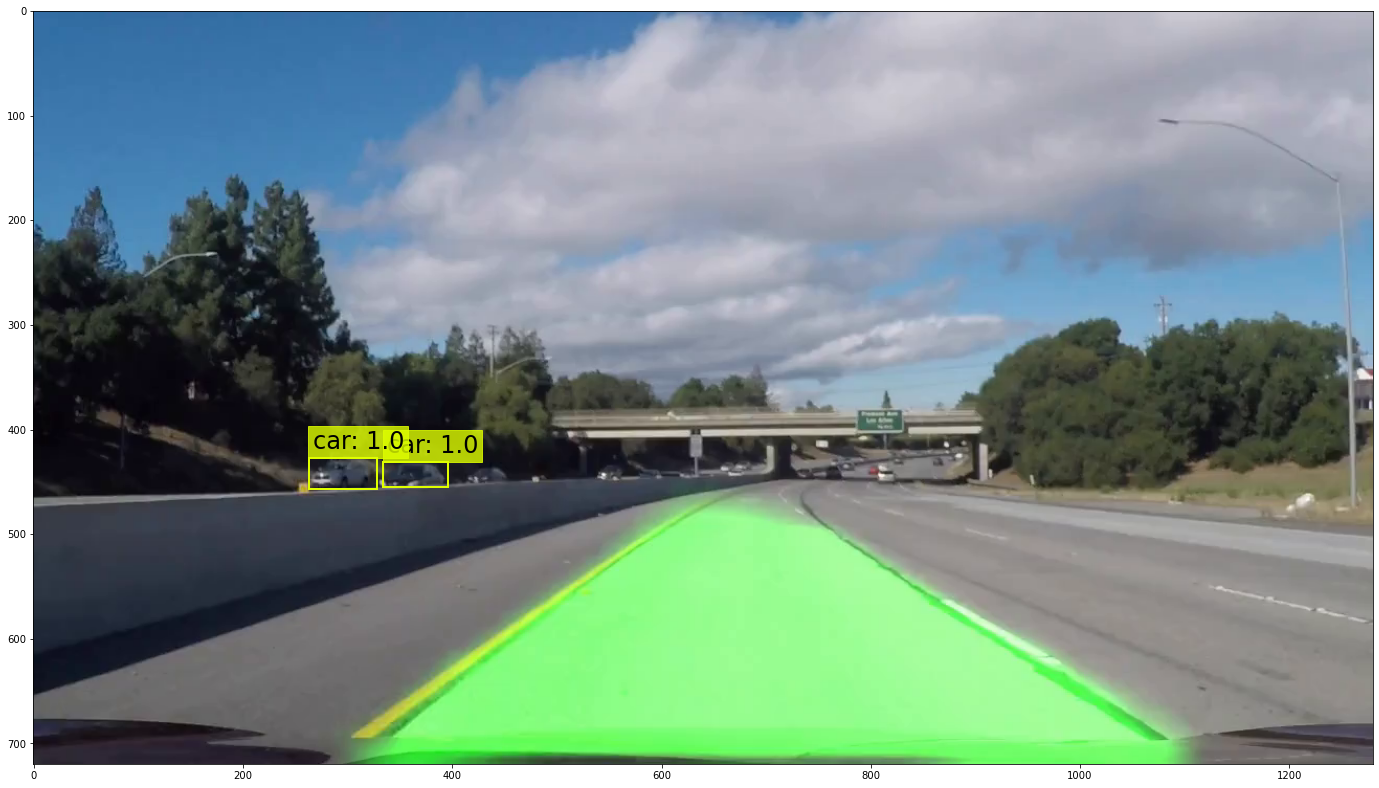

NameError: name 'fourcc' is not defined

In [10]:
import numpy as np
import cv2

cap = cv2.VideoCapture(r'\lanedetection\MLND-Capstone-master\MLND-Capstone-master\proj_chal_vid.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    # Convert the image to RGB
    original_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # We resize the image to the input width and height of the first layer of the network.    
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Set the IOU threshold. Default value is 0.4
    iou_thresh = 0.4

    # Set the NMS threshold. Default value is 0.6
    nms_thresh = 0.6

    # Detect objects in the image
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    #Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes, class_names, plot_labels = True)
    
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

cap.release()
cv2.destroyAllWindows()